# Visualising how my new Investment Portfolio would have performed in the past
## Background
I am looking to invest my savings of £10,000 on the website InvestEngine. I have created my own investment portfolio consisting of 13 ETFs based on recommendations from investing websites and books. I am now comfortable with the portfolio but I would like to know what would have happened had I begun this same investment strategy years ago. The project's goal is to construct a graph of 'Portfolio value', starting at £10,000, against 'Date' for the largest time period possible.

## Project Plan and Information
### Part 1: ETF Data
The CSV files containing each ETF's weekly stock price in the maximum time range available were downloaded from Yahoo finance. Each CSV file was turned into a dataframe and were screened for null and missing values which were imputed. 
<br>
<br>

### Part 2: Establishing a common time period
Given that the portfolio consists of 13 ETFs, a common time range had to be established - it is no use considering how the portfolio would have looked from 2014 onwards if half of the ETFs did not exist until 2020. Once a common time range was established, the ETFs were plotted.  
<br>
<br>

### Part 3: Adjust each ETF's value
Next, the ETFs stock prices were adjusted so that the first stock price in the common date range becomes equivalent to £10,000 by dividing every value in each column by the start price of that column and multiplying by 10,000. This was done because if I have a £10,000 investment portfolio and I invest 10% in CRBL and 10% in CUKX, that is obviously £1000 invested in each ETF, however, for CRBL and CUKX, the starting stock prices are £1,100 and £11,000 respectively which are not equivalent. 
<br>
<br>

### Part 4: Combining the ETFs according to my investment split
My portfolio is not equally divided between all of the ETFs. For instance, 35% of my entire portfolio is in the Invesco S&P 500 ETF (SPXP). The project will combine the portfolio values of every ETF on every available past date in the same ETF division as my portfolio by multiplying each value by it's ratio - SPXP would have each value multiplied by 0.35 as it makes up 35% of the portfolio. The combined ETF value for each date was stored as a column in a dataframe.
<br>
<br>

### Part 5: Factoring in Dividends
Each ETF has an annual dividend yield percentage which is how much money the ETF would pay the investor. This portfolio uses accumulating dividends which means any money paid out by dividends is automatically reinvested. Dividends are paid out quarterly and each ETF has a different dividend yield. The weighted average dividend yield was calculated and this was added every four months throughout the time period.
<br>
<br>


### Part 6: Visualising the portfolio value over time
The final visualisation shows the value of the entire portfolio including accumulating dividends over the largest time period available. 
<br>
<br>



# Importing Libraries

In [132]:
pip install --user numpy

Note: you may need to restart the kernel to use updated packages.


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from os import listdir
%matplotlib inline

# ETF Split Visualisation

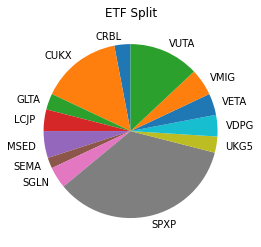

In [134]:
# Define the dictionary with ETF keys and split ratio values
split = {
    "CRBL": 0.03,
    "CUKX": 0.15,
    "GLTA": 0.03,
    "LCJP": 0.04,
    "MSED": 0.05,
    "SEMA": 0.02,
    "SGLN": 0.04, 
    "SPXP": 0.35,
    "UKG5": 0.03,
    "VDPG": 0.04,
    "VETA": 0.04,
    "VMIG": 0.05,
    "VUTA": 0.13,
}

# Extract lists from dictionary for a pie chart
split_list = list(split.values())
split_keys = list(split.keys())

# Create the pie chart
plt.pie(split_list, labels=split_keys, autopct='', startangle=90)

#Pie chart title
plt.title('ETF Split')

# Show the pie chart
plt.show()


# Part 1: ETF Data

## Reading Data into Dataframes
Data is read from CSV files into Dataframes and only the relevant columns are retained. The dataframes are named the same as their ETF code.

In [135]:
# Filepath for reading csv files 
path = "Code_Max_Weekly/"

# Function used to create a list of all the csv files stored in the path
def find_csv_filenames(path, suffix=".csv"):
    filenames = listdir(path) # Retrieve a list of files in the 'path' directory
    return [filename for filename in filenames if filename.endswith(suffix)] # Return the csv filenames

# Create a list of all the csv files called 'codes'
codes = find_csv_filenames(path, suffix=".csv")
print("codes: ", codes)

# Create a list called 'df_codes' that contains the csv filenames after removing '.csv' 
df_codes = [code.split(".")[0] for code in codes]
print("df_codes: ", df_codes)

# Storing the csv files in 'codes' as a dataframe with a name corresponding to 'df_codes' 
for code, df_code in zip(codes, df_codes):  # Loop over each pair of codes and df_codes
    df = pd.read_csv(path+code, usecols=['Date', 'Close'])  # Read CSV file with relevant columns
    df = df.rename(columns={'Close': 'Stock Price'})  # Rename 'Close' column to 'Stock Price'
    # For future use, I want to access the dataframes in a list of dataframes
    globals()[df_code] = df  # Assign the DataFrame to a variable with the name stored in df_code
    
# Checking my work
print(CRBL.head(3))
print(CUKX.head(3))
print(MSED.head(3))




codes:  ['CRBL.csv', 'CUKX.csv', 'GLTA.csv', 'LCJP.csv', 'MSED.csv', 'SEMA.csv', 'SGLN.csv', 'SPXP.csv', 'UKG5.csv', 'VDPG.csv', 'VETA.csv', 'VMIG.csv', 'VUTA.csv']
df_codes:  ['CRBL', 'CUKX', 'GLTA', 'LCJP', 'MSED', 'SEMA', 'SGLN', 'SPXP', 'UKG5', 'VDPG', 'VETA', 'VMIG', 'VUTA']
         Date  Stock Price
0  2008-01-01       2399.0
1  2008-01-08       2390.0
2  2008-01-15       2390.0
         Date  Stock Price
0  2010-09-13       6484.0
1  2010-09-20       6520.0
2  2010-09-27       6520.0
         Date  Stock Price
0  2013-04-01  9796.360352
1  2013-04-08  9999.700195
2  2013-04-15  9784.370117


## Checking for nulls 

In [136]:
# Loop through the list of DataFrame names
for df_code in df_codes:
    # Access the global variable representing the DataFrame
    df = globals()[df_code]
    # Print the count of null values for each column in the DataFrame
    print(df_code, ":\n", df.isnull().sum(), "\n")

CRBL :
 Date           0
Stock Price    0
dtype: int64 

CUKX :
 Date           0
Stock Price    0
dtype: int64 

GLTA :
 Date           0
Stock Price    0
dtype: int64 

LCJP :
 Date           0
Stock Price    0
dtype: int64 

MSED :
 Date           0
Stock Price    0
dtype: int64 

SEMA :
 Date           0
Stock Price    0
dtype: int64 

SGLN :
 Date           0
Stock Price    0
dtype: int64 

SPXP :
 Date           0
Stock Price    1
dtype: int64 

UKG5 :
 Date           0
Stock Price    0
dtype: int64 

VDPG :
 Date           0
Stock Price    0
dtype: int64 

VETA :
 Date           0
Stock Price    0
dtype: int64 

VMIG :
 Date           0
Stock Price    0
dtype: int64 

VUTA :
 Date           0
Stock Price    0
dtype: int64 



There is one null value in the 'Stock Price' column of 'SPXP'. This value will be replaced by the most recent 'Stock Price' value which preceded the date corresponding to the null value.

In [137]:
# Replace missing values in 'Stock Price' column with most recent non-null value
SPXP['Stock Price'].fillna(method='ffill', inplace=True)

# Check for nulls again by repeating the above code
for df_code in df_codes:
    df = globals()[df_code]
    print(df_code, ":\n", df.isnull().sum(), "\n")

CRBL :
 Date           0
Stock Price    0
dtype: int64 

CUKX :
 Date           0
Stock Price    0
dtype: int64 

GLTA :
 Date           0
Stock Price    0
dtype: int64 

LCJP :
 Date           0
Stock Price    0
dtype: int64 

MSED :
 Date           0
Stock Price    0
dtype: int64 

SEMA :
 Date           0
Stock Price    0
dtype: int64 

SGLN :
 Date           0
Stock Price    0
dtype: int64 

SPXP :
 Date           0
Stock Price    0
dtype: int64 

UKG5 :
 Date           0
Stock Price    0
dtype: int64 

VDPG :
 Date           0
Stock Price    0
dtype: int64 

VETA :
 Date           0
Stock Price    0
dtype: int64 

VMIG :
 Date           0
Stock Price    0
dtype: int64 

VUTA :
 Date           0
Stock Price    0
dtype: int64 



There are now no null values. 

# Part 2: Establishing a common time period 

## Converting date format
I am British so I am converting the data format into a format more intuitive for me.

In [138]:
# Loop through all dataframes
for df_code in df_codes:
    # Extract the actual dataframe from the globals() dictionary
    df = globals()[df_code]
    
    # Check if 'Date' column is already of datetime type to prevent error when re-running the cell
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        try:
            # Convert 'Date' column to datetime type with correct format
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        except ValueError:
            # Handle ValueError if date format does not match
            print(f"Skipping date conversion for '{df_code}' - already in desired format")
    
    # Check if 'Date' column is of datetime type before updating date format
    if pd.api.types.is_datetime64_any_dtype(df['Date']):
        # Update 'Date' column to desired date format
        df['Date'] = df['Date'].dt.strftime('%d-%m-%y')
        
# Checking my work
print(VMIG.head(3))
print(CRBL.head(3))

       Date  Stock Price
0  13-05-19    30.225500
1  20-05-19    29.678900
2  27-05-19    29.446501
       Date  Stock Price
0  01-01-08       2399.0
1  08-01-08       2390.0
2  15-01-08       2390.0


## Finding the largest common date range
Different stocks have different starting dates in the historical data, if I want to see history for a portfolio that combines all of the ETFs, one must find the ETF with the most recent start date and then can combine them all from this date onwards.

In [139]:
# Initialise list for storing minimum dates
min_dates = []

# Loop through all dataframes and store minimum dates
for df_code in df_codes:
    # Access the global variable representing the DataFrame
    df = globals()[df_code]
    
    # Convert 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
    
    # Find and store minimum date in the 'Date' column
    min_date = df['Date'].min()
    min_dates.append(min_date)

# Find closest date to current date from the list of minimum dates
closest_date = min_dates[min_dates.index(max(min_dates))]

# Print closest date
print("Closest common date in UK date format: ", closest_date.strftime('%d-%m-%y'))



Closest common date in UK date format:  30-11-20


## Creating new dataframes exclusively for the common date range
Now we know that the ETF combination has historical data for the 30th of November 2020 and onwards. We shall create new dataframes which only include data from this data and onwards. These dataframes will feature the original code name followed by '_30Nov20'. 

In [140]:
# Create an empty list to store the new DataFrame names
df_codes_30Nov20 = []

# Loop through the original DataFrame names
for df_code in df_codes:
    # Access the global variable representing the original DataFrame
    df = globals()[df_code]
    
    # Create a copy of the DataFrame
    df_copy = df.copy()
    
    # Filter the rows based on the date condition
    df_copy = df_copy[df_copy['Date'] >= '30-11-20']
    
    # Append '_30Nov20' to the original DataFrame name to create the new DataFrame name
    new_df_name = df_code + '_30Nov20'
    
    # Assign the filtered DataFrame to the global variable with the new name
    globals()[new_df_name] = df_copy
    
    # Append the new DataFrame name to the list of new DataFrame names
    df_codes_30Nov20.append(new_df_name)

  
    
# Checking my work
print(df_codes_30Nov20)  
print(SPXP_30Nov20.head(3))
print(VMIG_30Nov20.head(3))
print(SEMA_30Nov20.head(3))

['CRBL_30Nov20', 'CUKX_30Nov20', 'GLTA_30Nov20', 'LCJP_30Nov20', 'MSED_30Nov20', 'SEMA_30Nov20', 'SGLN_30Nov20', 'SPXP_30Nov20', 'UKG5_30Nov20', 'VDPG_30Nov20', 'VETA_30Nov20', 'VMIG_30Nov20', 'VUTA_30Nov20']
          Date  Stock Price
333 2020-11-30      50916.5
334 2020-12-07      51255.0
335 2020-12-14      50970.5
         Date  Stock Price
81 2020-11-30    32.532501
82 2020-12-07    31.602501
83 2020-12-14    32.439999
          Date  Stock Price
920 2020-11-30    50.849998
921 2020-12-07    50.720001
922 2020-12-14    50.990002


Converting date format again

In [141]:
# Loop through all dataframes
for df_code in df_codes_30Nov20:
    # Extract the actual dataframe from the globals() dictionary
    df = globals()[df_code]
    
    # Check if 'Date' column is already of datetime type to prevent error when re-running the cell
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        try:
            # Convert 'Date' column to datetime type with correct format
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        except ValueError:
            # Handle ValueError if date format does not match
            print(f"Skipping date conversion for '{df_code}' - already in desired format")
    
    # Check if 'Date' column is of datetime type before updating date format
    if pd.api.types.is_datetime64_any_dtype(df['Date']):
        # Update 'Date' column to desired date format
        df['Date'] = df['Date'].dt.strftime('%d-%m-%y')
        
# Checking
print(df_codes_30Nov20)  
print(SPXP_30Nov20.head(3))
print(VMIG_30Nov20.head(3))
print(SEMA_30Nov20.head(3))

['CRBL_30Nov20', 'CUKX_30Nov20', 'GLTA_30Nov20', 'LCJP_30Nov20', 'MSED_30Nov20', 'SEMA_30Nov20', 'SGLN_30Nov20', 'SPXP_30Nov20', 'UKG5_30Nov20', 'VDPG_30Nov20', 'VETA_30Nov20', 'VMIG_30Nov20', 'VUTA_30Nov20']
         Date  Stock Price
333  30-11-20      50916.5
334  07-12-20      51255.0
335  14-12-20      50970.5
        Date  Stock Price
81  30-11-20    32.532501
82  07-12-20    31.602501
83  14-12-20    32.439999
         Date  Stock Price
920  30-11-20    50.849998
921  07-12-20    50.720001
922  14-12-20    50.990002


## Visualising each ETFs stock price for the common time period

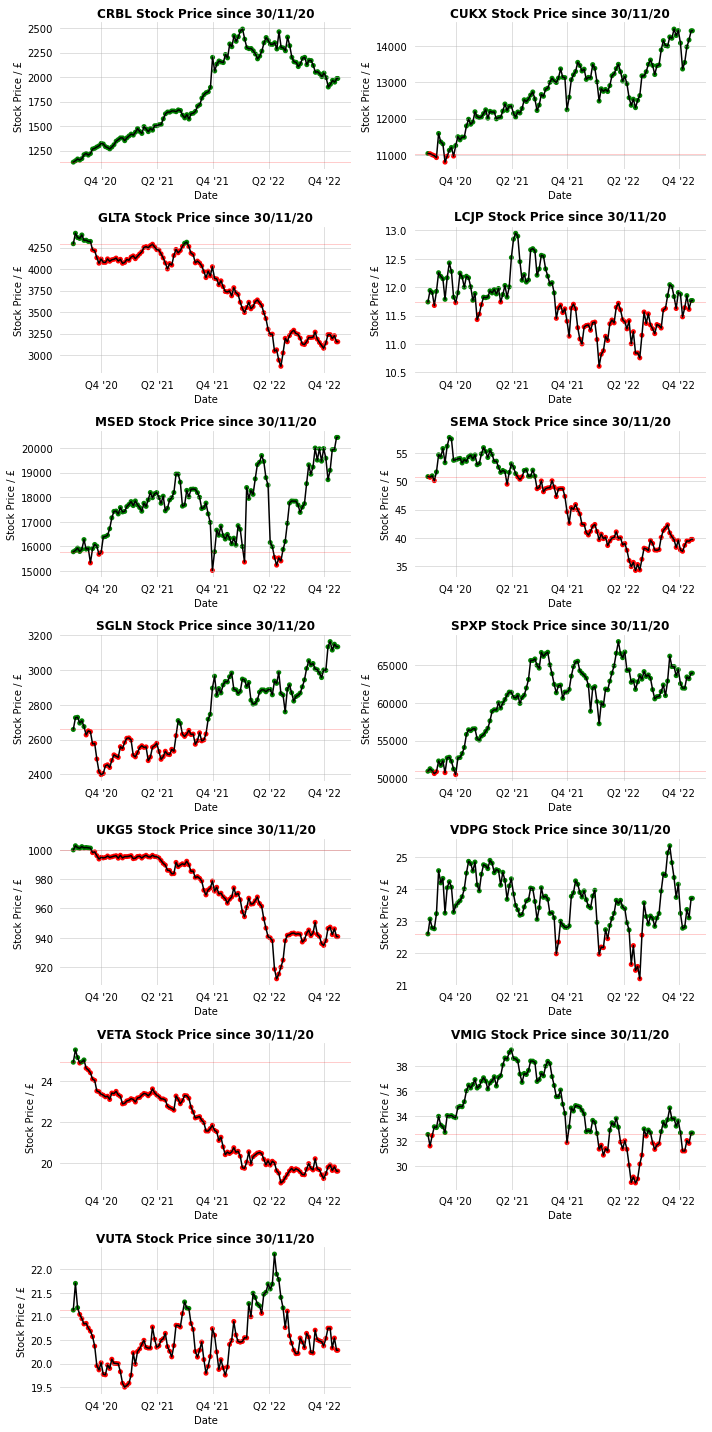

In [142]:
# Determine the number of DataFrames in the list
num_df = len(df_codes_30Nov20)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_df + 1) // 2
num_cols = min(2, num_df)

# Create subplots with calculated number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of DataFrame names
for i, df_name in enumerate(df_codes_30Nov20):
    # Access the DataFrame using the name
    df = globals()[df_name]
    
    # Convert 'Date' column to datetime objects with original format '%d-%m-%y'
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
    
    # Plot the 'Date' column on the x-axis and the 'Stock Price' column on the y-axis
    start_price = df.iloc[0, 1]
    
    color_list = []  # Initialize an empty list to store colors for each data point
    for x in range(len(df.iloc[:,0])):  # Loop over each row in the 'df' DataFrame df.iloc[:, [0]]
        if df.iloc[x, 1] >= start_price:  # Check if the value at the current row is >= 'start_price'
            point_color = 'green'  # If yes, set point_color to 'green'
        else: 
            point_color = 'red'  # If no, set point_color to 'red'
        color_list.append(point_color)  # Append the point_color to the color_list
    
    # Create a scatter plot with date on x-axis, stock price on y-axis, and color_list as point colors
    axs[i].scatter(df['Date'], df['Stock Price'], linewidth=2, color=color_list, marker=".")  
    
    # Plot a line in black to connect the scatter points
    # OLD CODE THAT BROKE AFTER PACKAGE UPDATE: axs[i].plot(df['Date'], df['Stock Price'], label=df_name, color='black')
    axs[i].plot(df['Date'].values, df['Stock Price'].values, label=df_name, color='black')

    
    # Add a horizontal line at y=start_price
    axs[i].axhline(y=start_price, color='red', linestyle='-', linewidth=1, alpha = 0.2) 
    
    axs[i].set_xlabel('Date')  # Set x-axis label to 'Date'
    axs[i].set_ylabel('Stock Price / £')  # Set y-axis label to 'Stock Price / £'
    axs[i].set_title(df_name.split("_")[0] + ' Stock Price since 30/11/20', weight='bold')  # df_code features in each title

    # Set the x-axis locator to MonthLocator with interval 6 (for every other quarterly tick)
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    
    # Format the x-axis tick labels
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) # British Date style
    custom_tick_labels = ["Q4 '20", "Q2 '21", "Q4 '21", "Q2 '22", "Q4 '22"] # Display every other quarter
    axs[i].set_xticklabels(custom_tick_labels) # Set custom labels
    
    # Add gridlines for readability
    axs[i].grid(alpha=0.5)
    
    # Remove graph spines for readability 
    for location in ['left', 'right', 'bottom', 'top']:
        axs[i].spines[location].set_visible(False)
        
    # Remove ticks for readability    
    axs[i].tick_params(bottom=False, left=False)
    
    # Remove axis from empty graph at the end
    axs[-1].axis('off') 

# Use plt.tight_layout() to apply spacing between subplots
plt.tight_layout()
plt.show()

# Part 3: Adjusting each ETF's value
Adjust every dataframe by dividing every value in each column by the first value of that column for each ETF and multiplying by 10,000. This results in a starting value of £10,000 for each ETF. This is done to prepare for combining the ETFs afterwards.

## Adjusting the data

In [143]:
# Initialise a list to store the adjusted dataframes
df_codes_30Nov20_adj = []

# Loop through every df_code in the common date dataframe list df_codes_30Nov20 
for df_code in df_codes_30Nov20:
    # Access the global variable representing the original DataFrame
    df = globals()[df_code]
    
    # Create a copy of the DataFrame called 'df_copy'
    df_copy = df.copy()
    
    # Append 'adj' to the original DataFrame name to create the new DataFrame name
    new_df_name = df_code + '_adj'
    
    # Assign the filtered DataFrame to the global variable with the new name
    globals()[new_df_name] = df_copy
    
    # Append the new DataFrame name to the list of new DataFrame names
    df_codes_30Nov20_adj.append(new_df_name)
    
    # Apply the division to create the new column
    start_value = df.iloc[0, 1]
    df_copy["Adjusted Stock Price"] = 10000 * df['Stock Price'] / start_value
    
# Checking my work
print(df_codes_30Nov20_adj)
print(CRBL_30Nov20_adj.head(3))
print(CRBL_30Nov20.head(3))
print(CUKX_30Nov20_adj.head(3))
print(CUKX_30Nov20.head(3))

['CRBL_30Nov20_adj', 'CUKX_30Nov20_adj', 'GLTA_30Nov20_adj', 'LCJP_30Nov20_adj', 'MSED_30Nov20_adj', 'SEMA_30Nov20_adj', 'SGLN_30Nov20_adj', 'SPXP_30Nov20_adj', 'UKG5_30Nov20_adj', 'VDPG_30Nov20_adj', 'VETA_30Nov20_adj', 'VMIG_30Nov20_adj', 'VUTA_30Nov20_adj']
          Date  Stock Price  Adjusted Stock Price
674 2020-12-01  1132.400024          10000.000000
675 2020-12-08  1146.500000          10124.514091
676 2020-12-15  1164.300049          10281.702793
          Date  Stock Price
674 2020-12-01  1132.400024
675 2020-12-08  1146.500000
676 2020-12-15  1164.300049
          Date  Stock Price  Adjusted Stock Price
533 2020-11-30      11041.0          10000.000000
534 2020-12-07      11036.0           9995.471425
535 2020-12-14      11006.0           9968.299973
          Date  Stock Price
533 2020-11-30      11041.0
534 2020-12-07      11036.0
535 2020-12-14      11006.0


### Converting date format for 'df_codes_30Nov20_adj'

In [144]:
# Loop through all dataframes
for df_code in df_codes_30Nov20_adj:
    # Extract the actual dataframe from the globals() dictionary
    df = globals()[df_code]
    
    # Check if 'Date' column is already of datetime type to prevent error when re-running the cell
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        try:
            # Convert 'Date' column to datetime type with correct format
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        except ValueError:
            # Handle ValueError if date format does not match
            print(f"Skipping date conversion for '{df_code}' - already in desired format")
    
    # Check if 'Date' column is of datetime type before updating date format
    if pd.api.types.is_datetime64_any_dtype(df['Date']):
        # Update 'Date' column to desired date format
        df['Date'] = df['Date'].dt.strftime('%d-%m-%y')
        
# Checking my work
print(CRBL_30Nov20_adj)
print(CUKX_30Nov20_adj)

         Date  Stock Price  Adjusted Stock Price
674  01-12-20  1132.400024          10000.000000
675  08-12-20  1146.500000          10124.514091
676  15-12-20  1164.300049          10281.702793
677  22-12-20  1153.699951          10188.095430
678  29-12-20  1168.000000          10314.376327
..        ...          ...                   ...
794  21-03-23  1927.000000          17016.954779
795  28-03-23  1967.500000          17374.602246
796  04-04-23  1948.900024          17210.349547
797  11-04-23  1986.500000          17542.387477
798  14-04-23  1986.500000          17542.387477

[125 rows x 3 columns]
         Date  Stock Price  Adjusted Stock Price
533  30-11-20      11041.0          10000.000000
534  07-12-20      11036.0           9995.471425
535  14-12-20      11006.0           9968.299973
536  21-12-20      10981.0           9945.657096
537  28-12-20      10928.0           9897.654198
..        ...          ...                   ...
653  20-03-23      13546.0          12268.816

## Checking adjusted data's graph shape is the same
Visualisation to check that the method is correct.

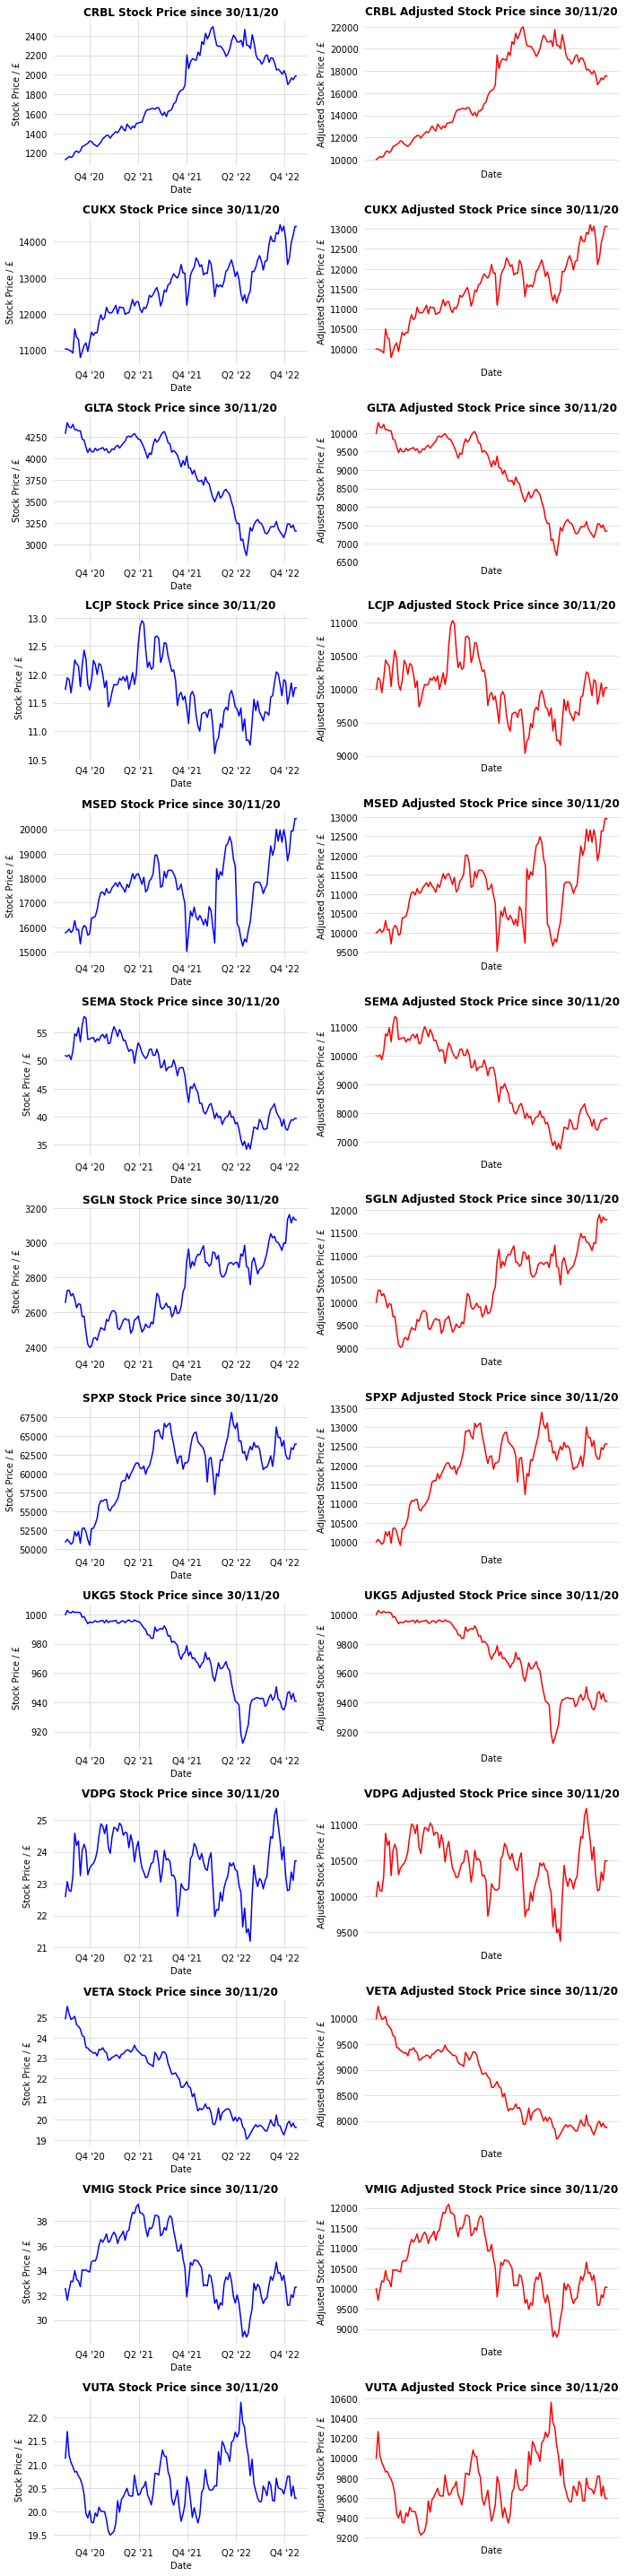

In [145]:
# Determine the number of DataFrames in the list
num_df = len(df_codes_30Nov20) + len(df_codes_30Nov20_adj)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_df + 1) // 2
num_cols = min(2, num_df)

# Create subplots with calculated number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 40), sharex=False, sharey=False)

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of DataFrame names
i = 0
for (df_name, df_name_adj) in zip(df_codes_30Nov20, df_codes_30Nov20_adj):
    
    # Access the DataFrame using the name
    df = globals()[df_name]
    df_a = globals()[df_name_adj]
    
    axs[i].plot(df['Date'].values, df['Stock Price'].values, color='blue')
    axs[i].set_ylabel('Stock Price / £')  # Set y-axis label to 'Stock Price / £'
    axs[i].set_title(df_name.split("_")[0] + ' Stock Price since 30/11/20', weight='bold')  # df_code features in each title
    axs[i+1].plot(df_a['Date'].values, df_a['Adjusted Stock Price'].values, color='red')
    axs[i+1].set_ylabel('Adjusted Stock Price / £')  # Set y-axis label to 'Adjusted Stock Price / £'
    axs[i+1].set_title(df_name.split("_")[0] + ' Adjusted Stock Price since 30/11/20', weight='bold')  # df_code features in each title

    # Convert 'Date' column to datetime objects with original format '%d-%m-%y'
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
    df['Date'] = pd.to_datetime(df_a['Date'], format='%d-%m-%y')
    
    axs[i].set_xlabel('Date')  # Set x-axis label to 'Date'
    axs[i+1].set_xlabel('Date')  # Set x-axis label to 'Date'

    # Set the x-axis locator to MonthLocator with interval 3 (for quarterly ticks)
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    axs[i+1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    
    # Format the x-axis tick labels
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) # British Date style
    axs[i+1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) # British Date style
    custom_tick_labels = ["Q4 '20", "Q2 '21", "Q4 '21", "Q2 '22", "Q4 '22"] # Display every other quarter
    axs[i].set_xticklabels(custom_tick_labels) # Set custom labels
    axs[i+1].set_xticklabels(custom_tick_labels) # Set custom labels
    
    # Add gridlines for readability
    axs[i].grid(alpha=0.5)
    axs[i+1].grid(alpha=0.5)
    
    # Remove graph spines for readability 
    for location in ['left', 'right', 'bottom', 'top']:
        axs[i].spines[location].set_visible(False)
        axs[i+1].spines[location].set_visible(False)
        
    # Remove ticks for readability    
    axs[i].tick_params(bottom=False, left=False)
    axs[i+1].tick_params(bottom=False, left=False)
    i += 2

# Use plt.tight_layout() to apply spacing between subplots
plt.tight_layout()
plt.show()

The shape is maintained which means no errors were made and we can continue.

# Part 4: Combining the ETFs according to my investment split
Firstly, create a dataframe that stores the daily dates throughout the common time period which can be used to merge all of the adjusted dataframes with to create one big dataframe. Then, multiply the columns by their portfolio fraction.

In [146]:
# Make a dataframe for every date inside the common history range

# Create a date range from November 30, 2020 to April 16, 2023
date_range = pd.date_range(start='2020-11-30', end='2023-04-16', freq='D')

# Convert the date range to a dataframe
dates_df = pd.DataFrame({'Date': date_range})

# Format the 'Date' column as a string in the desired datetime format
dates_df['Date'] = dates_df['Date'].dt.strftime('%d-%m-%y')

# Print the dataframe
print(dates_df)

         Date
0    30-11-20
1    01-12-20
2    02-12-20
3    03-12-20
4    04-12-20
..        ...
863  12-04-23
864  13-04-23
865  14-04-23
866  15-04-23
867  16-04-23

[868 rows x 1 columns]


### Format df_codes_30Nov20_adj 'Date' column

In [147]:
# Loop through all dataframes
for df_code in df_codes_30Nov20_adj:
    # Extract the actual dataframe from the globals() dictionary
    df = globals()[df_code]
    
    # Check if 'Date' column is already of datetime type to prevent error when re-running the cell
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        try:
            # Convert 'Date' column to datetime type with correct format
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        except ValueError:
            # Handle ValueError if date format does not match
            print(f"Skipping date conversion for '{df_code}' - already in desired format")
    
    # Check if 'Date' column is of datetime type before updating date format
    if pd.api.types.is_datetime64_any_dtype(df['Date']):
        # Update 'Date' column to desired date format
        df['Date'] = df['Date'].dt.strftime('%d-%m-%y')
        
# Checking my work
print(CRBL_30Nov20_adj)
print(CUKX_30Nov20_adj)

Skipping date conversion for 'CRBL_30Nov20_adj' - already in desired format
Skipping date conversion for 'CUKX_30Nov20_adj' - already in desired format
Skipping date conversion for 'GLTA_30Nov20_adj' - already in desired format
Skipping date conversion for 'LCJP_30Nov20_adj' - already in desired format
Skipping date conversion for 'MSED_30Nov20_adj' - already in desired format
Skipping date conversion for 'SEMA_30Nov20_adj' - already in desired format
Skipping date conversion for 'SGLN_30Nov20_adj' - already in desired format
Skipping date conversion for 'SPXP_30Nov20_adj' - already in desired format
Skipping date conversion for 'UKG5_30Nov20_adj' - already in desired format
Skipping date conversion for 'VDPG_30Nov20_adj' - already in desired format
Skipping date conversion for 'VETA_30Nov20_adj' - already in desired format
Skipping date conversion for 'VMIG_30Nov20_adj' - already in desired format
Skipping date conversion for 'VUTA_30Nov20_adj' - already in desired format
         Dat

## Merge all the dataframes in 'df_codes_30Nov20_adj' with the 'dates_df'

In [148]:
# Create copy
combo_df = dates_df.copy()

for df_name, df_code in zip(df_codes_30Nov20_adj, df_codes):
    # Access the DataFrame using the name
    df = globals()[df_name]
    
    # Merge dataframes on "Date" column
    combo_df = combo_df.merge(df[['Date', 'Adjusted Stock Price']], on='Date', how='left')
    
    # Each column needs a custom name
    combo_df = combo_df.rename(columns={'Adjusted Stock Price': df_code + ' Adjusted Stock Price'}) 
    
print(combo_df)

         Date  CRBL Adjusted Stock Price  CUKX Adjusted Stock Price   
0    30-11-20                        NaN               10000.000000  \
1    01-12-20               10000.000000                        NaN   
2    02-12-20                        NaN                        NaN   
3    03-12-20                        NaN                        NaN   
4    04-12-20                        NaN                        NaN   
..        ...                        ...                        ...   
863  12-04-23                        NaN                        NaN   
864  13-04-23                        NaN                        NaN   
865  14-04-23               17542.387477               13058.599765   
866  15-04-23                        NaN                        NaN   
867  16-04-23                        NaN                        NaN   

     GLTA Adjusted Stock Price  LCJP Adjusted Stock Price   
0                  10000.00000               10000.000000  \
1                        

## Forward and backward fill missing 'NaN' values

In [149]:
# Fill NaN values with previous non-null value
combo_df_fill = combo_df.copy()
combo_df_filln  = combo_df_fill.fillna(method='ffill')
combo_df_fillna  = combo_df_filln.fillna(method='bfill')

# Print combined data
print(combo_df_fillna)

         Date  CRBL Adjusted Stock Price  CUKX Adjusted Stock Price   
0    30-11-20               10000.000000               10000.000000  \
1    01-12-20               10000.000000               10000.000000   
2    02-12-20               10000.000000               10000.000000   
3    03-12-20               10000.000000               10000.000000   
4    04-12-20               10000.000000               10000.000000   
..        ...                        ...                        ...   
863  12-04-23               17542.387477               13058.599765   
864  13-04-23               17542.387477               13058.599765   
865  14-04-23               17542.387477               13058.599765   
866  15-04-23               17542.387477               13058.599765   
867  16-04-23               17542.387477               13058.599765   

     GLTA Adjusted Stock Price  LCJP Adjusted Stock Price   
0                  10000.00000               10000.000000  \
1                  10000.

# Part 4: Combining the ETFs according to my investment split

In [150]:
# Copy the dataframe before adding new columns
combo_df_fillna_port = combo_df_fillna.copy()

# Define the split dictionary
split = {
    "CRBL": 0.03,
    "CUKX": 0.15,
    "GLTA": 0.03,
    "LCJP": 0.04,
    "MSED": 0.05,
    "SEMA": 0.02,
    "SGLN": 0.04, 
    "SPXP": 0.35,
    "UKG5": 0.03,
    "VDPG": 0.04,
    "VETA": 0.04,
    "VMIG": 0.05,
    "VUTA": 0.13,
}

# Iterate over the items in the split dictionary
for key, value in split.items():
    # Update the corresponding columns in combo_df_fillna_port DataFrame
    combo_df_fillna_port[key + " Portfolio Adjusted Stock Price"] = combo_df_fillna_port[key + " Adjusted Stock Price"] * value

combo_df_fillna_port["£10,000 investment"] = combo_df_fillna_port.iloc[:, 14:27].sum(axis=1)
print(combo_df_fillna_port)


         Date  CRBL Adjusted Stock Price  CUKX Adjusted Stock Price   
0    30-11-20               10000.000000               10000.000000  \
1    01-12-20               10000.000000               10000.000000   
2    02-12-20               10000.000000               10000.000000   
3    03-12-20               10000.000000               10000.000000   
4    04-12-20               10000.000000               10000.000000   
..        ...                        ...                        ...   
863  12-04-23               17542.387477               13058.599765   
864  13-04-23               17542.387477               13058.599765   
865  14-04-23               17542.387477               13058.599765   
866  15-04-23               17542.387477               13058.599765   
867  16-04-23               17542.387477               13058.599765   

     GLTA Adjusted Stock Price  LCJP Adjusted Stock Price   
0                  10000.00000               10000.000000  \
1                  10000.

10000.0


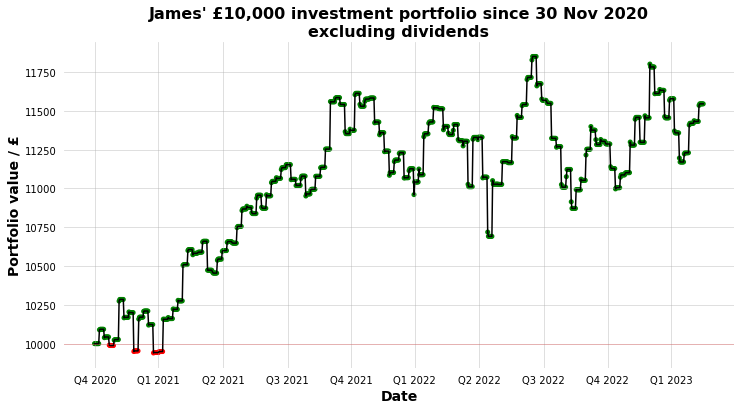

<class 'pandas.core.series.Series'>


<Figure size 432x288 with 0 Axes>

In [151]:
# Convert 'Date' column to datetime objects with original format '%d-%m-%y'
combo_df_fillna_port['Date'] = pd.to_datetime(combo_df_fillna_port['Date'], format='%d-%m-%y')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

start_price = combo_df_fillna_port.iloc[0, -1]
print(start_price)

# color condition    
color_list = []
for x in range(len(combo_df_fillna_port.iloc[:,0])): # x for every date
    if combo_df_fillna_port.iloc[x, -1] >= start_price:
        point_color = 'green' 
    else: 
        point_color = 'red' 
    color_list.append(point_color) 
    
ax.scatter(combo_df_fillna_port['Date'], combo_df_fillna_port['£10,000 investment'], linewidth=2, color=color_list, marker=".")

# Plot the 'Date' column on the x-axis and the 'Stock Price' column on the y-axis
ax.plot(combo_df_fillna_port['Date'].values, combo_df_fillna_port['£10,000 investment'].values, color='black')

# Set the x-axis label
ax.set_xlabel('Date', weight='bold', fontsize=14)

# Set the y-axis label
ax.set_ylabel('Portfolio value / £', weight='bold', fontsize=14)

# Set the plot title
ax.set_title('James\' £10,000 investment portfolio since 30 Nov 2020\nexcluding dividends', weight='bold', fontsize=16)

# Set the x-axis locator to MonthLocator with interval 3 (for quarterly ticks)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Format the x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) #%d-%m-%y

custom_tick_labels = ["Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021", "Q1 2022", 
             "Q2 2022", "Q3 2022", "Q4 2022", "Q1 2023"]

ax.set_xticklabels(custom_tick_labels)

ax.grid(alpha=0.5)

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

ax.axhline(y=start_price, color='red', linestyle='-', linewidth=1, alpha = 0.2)

# Show the plot
plt.show()
plt.tight_layout()
print(type(combo_df_fillna_port['Date']))

# Part 5: Factoring in Dividends
Dividend yield: a dividend expressed as a percentage of a current share price. Generally, dividends are paid quarterly. I found the average dividend yield to be 1.59%. Thus, add 1.59% to the money every quarter. 
<br>
Note: The dividend yield is a combination of the yield today and from the past three years. If an ETF has no dividend yield information available then it is because it is an accumulating ETF so I found the distributing ETF equivalent instead.

In [152]:
print("Average weighted annual yield percentage: 1.59%")

Average weighted annual yield percentage: 1.59%


First, copy the dataframes £10,000 investment column and Date

In [153]:
dividend_po = combo_df_fillna_port.copy()
dividend_port = dividend_po.iloc[:, [0,27]]

print(dividend_port)

          Date  £10,000 investment
0   2020-11-30         10000.00000
1   2020-12-01         10000.00000
2   2020-12-02         10000.00000
3   2020-12-03         10000.00000
4   2020-12-04         10000.00000
..         ...                 ...
863 2023-04-12         11544.44475
864 2023-04-13         11544.44475
865 2023-04-14         11544.44475
866 2023-04-15         11544.44475
867 2023-04-16         11544.44475

[868 rows x 2 columns]


Now I have to add 1.59% to the £10,000 investment column for every quarter. To do this, I make a list of the quarters in my time range and then for the value in '£10,000 investment' corresponding with each quarter, I have to increase it by 1.59% of its current value and increase every single value below it by the same amount.  

In [154]:
quarters = ["01-01-21", "01-04-21", "01-07-21", "01-10-21", "01-01-22", "01-04-22", "01-07-22", "01-10-22", 
           "01-01-23", "01-04-23"]

dividend_port_2 = dividend_port.copy()

# Loop through quarters
for quarter in quarters:
    # Find the index of the row with the corresponding quarter
    row_index = dividend_port_2[dividend_port_2['Date'] == quarter].index[0]
    
    # Get the money quantity at the corresponding row
    money_quantity = dividend_port_2.at[row_index, '£10,000 investment']
    
    # Increase the money quantity by 1.59% / 4 of itself
    money_quantity_increase = money_quantity * 0.0159 / 4 #/4 to go from annual to quarterly
    dividend_port_2.at[row_index, '£10,000 investment'] += money_quantity_increase
    
    # Increase the money quantity in all rows below by the same amount
    dividend_port_2.loc[row_index+1:, '£10,000 investment'] += money_quantity_increase

# Part 6: Visualising the portfolio value over time

10000.0


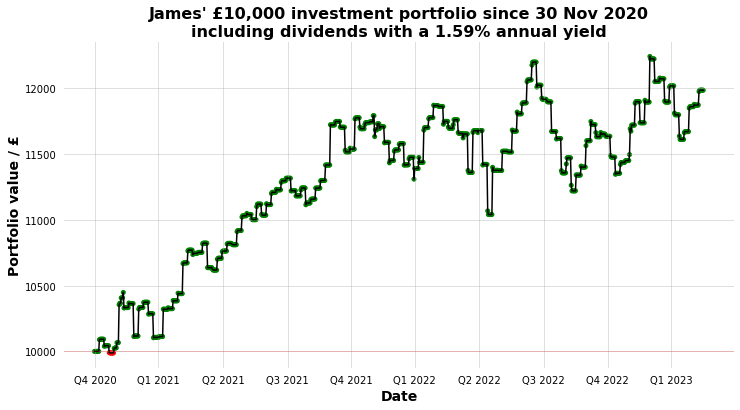

<class 'pandas.core.series.Series'>


<Figure size 432x288 with 0 Axes>

In [155]:
# Convert 'Date' column to datetime objects with original format '%d-%m-%y'
dividend_port_2['Date'] = pd.to_datetime(combo_df_fillna_port['Date'], format='%d-%m-%y')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

start_price = dividend_port_2.iloc[0, -1]
print(start_price)

# color condition    
color_list = []
for x in range(len(dividend_port_2.iloc[:,0])): # x for every date
    if dividend_port_2.iloc[x, -1] >= start_price:
        point_color = 'green' 
    else: 
        point_color = 'red' 
    color_list.append(point_color) 
    
ax.scatter(dividend_port_2['Date'], dividend_port_2['£10,000 investment'], linewidth=2, color=color_list, marker=".")

# Plot the 'Date' column on the x-axis and the 'Stock Price' column on the y-axis
ax.plot(dividend_port_2['Date'].values, dividend_port_2['£10,000 investment'].values, color='black')

# Set the x-axis label
ax.set_xlabel('Date', weight='bold', fontsize=14)

# Set the y-axis label
ax.set_ylabel('Portfolio value / £', weight='bold', fontsize=14)

# Set the plot title
ax.set_title('James\' £10,000 investment portfolio since 30 Nov 2020\nincluding dividends with a 1.59% annual yield', weight='bold', fontsize=16)

# Set the x-axis locator to MonthLocator with interval 3 (for quarterly ticks)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Format the x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) #%d-%m-%y

custom_tick_labels = ["Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021", "Q1 2022", 
             "Q2 2022", "Q3 2022", "Q4 2022", "Q1 2023"]

ax.set_xticklabels(custom_tick_labels)

ax.grid(alpha=0.5)

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

ax.axhline(y=start_price, color='red', linestyle='-', linewidth=1, alpha = 0.2)

# Show the plot
plt.show()
plt.tight_layout()
print(type(combo_df_fillna_port['Date']))